

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca

https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec12-slides.pdf

Spectral Decomposition theory note
http://www.stat.umn.edu/geyer/f07/5601/notes/spect.pdf

PCA from scratch for PyTorch etc.
https://medium.com/@ravikalia/pca-done-from-scratch-with-python-2b5eb2790bfc

In [ ]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("/home/jovyan", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import xlrd
import matplotlib.pyplot as plt
from preprocessing import add_feature_set_1
%matplotlib inline


In [3]:
os.chdir("/home/jovyan/dataset/set100.data")

In [4]:
df = pd.read_csv('_fs2.csv.gz') # Load FS01 dataset

In [5]:
df.tail()

,Unnamed: 0,key_0,Price,MV,VA,VO,DY,Date,Ticker,Sector,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
134994,134994,2019-12-24,13.4,5916.91,43853.1,3283.1,3.36,2019-12-24,WORK,Media & Publishing,...,-69.230803,-1.718824,13.970206,-4.285717,-17.993092,-18.920791,0.927698,-1.470594,-1.481514,-17.356904
134995,134995,2019-12-25,13.6,6005.22,25806.5,1918.2,3.31,2019-12-25,WORK,Media & Publishing,...,-53.846131,-1.580588,13.951800,-2.158268,-18.634808,-18.863594,0.228786,1.492543,1.481514,-16.123420
134996,134996,2019-12-26,13.9,6137.69,26514.5,1907.0,3.24,2019-12-26,WORK,Media & Publishing,...,-30.769270,-1.358235,13.949225,5.303029,-19.059525,-18.902780,-0.156744,2.205877,2.181899,-14.273206
134997,134997,2019-12-27,14.1,6226.00,22389.9,1587.2,3.19,2019-12-27,WORK,Media & Publishing,...,-15.384598,-1.135882,13.953622,7.633588,-20.348335,-19.191891,-1.156444,1.438854,1.428601,-13.039723
134998,134998,2019-12-30,14.0,6181.84,2242.3,159.0,3.21,2019-12-30,WORK,Media & Publishing,...,-23.076934,-0.852059,13.956885,4.477615,-26.593044,-20.672122,-5.920923,-0.709223,-0.711749,-13.656465


In [10]:
df.columns[11:]

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
     

In [11]:
df_features = df[df.columns[11:]]
df_features.head()

,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,4.36,4.24,4.36,4.30,18027300.0,3.756939,7.163384e+01,18027300.0,0.000004,0.000000e+00,...,-49.999801,0.0,4.300000,0.0,0.000000,0.000000,0.000000,-17.772648,0.000000,0.000000
1,4.40,4.30,4.34,4.36,19155200.0,3.809362,3.831112e+06,37182500.0,0.103035,1.149311e+06,...,-24.999925,0.0,4.328048,0.0,0.496801,0.099360,0.397441,1.395347,1.385702,1.395347
2,4.50,4.38,4.40,4.46,23555200.0,3.896733,1.168284e+07,60737700.0,0.192349,1.321626e+06,...,-15.384587,0.0,4.388618,0.0,2.757028,0.630894,2.126134,2.293576,2.267669,3.720927
3,4.50,4.42,4.46,4.50,15468400.0,3.931681,2.715124e+07,76206100.0,0.356287,1.221213e+06,...,-0.000000,0.0,4.438915,0.0,1.033141,0.711343,0.321798,0.896860,0.892862,4.651158
4,4.48,4.42,4.42,4.46,3958800.0,3.896733,2.847084e+07,72247300.0,0.355154,1.024132e+06,...,-15.384587,0.0,4.448140,0.0,-5.707498,-0.572425,-5.135073,-0.888888,-0.892862,3.720927


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

df_features.dropna(inplace=True)
df_features

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,4.36,4.24,4.36,4.30,18027300.0,3.756939,7.163384e+01,18027300.0,0.000004,0.000000e+00,...,-49.999801,0.000000,4.300000,0.000000,0.000000,0.000000,0.000000,-17.772648,0.000000,0.000000
1,4.40,4.30,4.34,4.36,19155200.0,3.809362,3.831112e+06,37182500.0,0.103035,1.149311e+06,...,-24.999925,0.000000,4.328048,0.000000,0.496801,0.099360,0.397441,1.395347,1.385702,1.395347
2,4.50,4.38,4.40,4.46,23555200.0,3.896733,1.168284e+07,60737700.0,0.192349,1.321626e+06,...,-15.384587,0.000000,4.388618,0.000000,2.757028,0.630894,2.126134,2.293576,2.267669,3.720927
3,4.50,4.42,4.46,4.50,15468400.0,3.931681,2.715124e+07,76206100.0,0.356287,1.221213e+06,...,-0.000000,0.000000,4.438915,0.000000,1.033141,0.711343,0.321798,0.896860,0.892862,4.651158
4,4.48,4.42,4.42,4.46,3958800.0,3.896733,2.847084e+07,72247300.0,0.355154,1.024132e+06,...,-15.384587,0.000000,4.448140,0.000000,-5.707498,-0.572425,-5.135073,-0.888888,-0.892862,3.720927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134994,13.70,13.00,13.60,13.40,3282900.0,12.420717,-3.075054e+08,321970740.0,-0.233791,-2.514752e+05,...,-69.230803,-1.718824,13.970206,-4.285717,-17.993092,-18.920791,0.927698,-1.470594,-1.481514,-17.356904
134995,13.80,13.10,13.30,13.60,1918100.0,12.606101,-3.066834e+08,323888840.0,-0.181990,-1.607471e+05,...,-53.846131,-1.580588,13.951800,-2.158268,-18.634808,-18.863594,0.228786,1.492543,1.481514,-16.123420
134996,14.10,13.60,13.60,13.90,1906900.0,12.884177,-3.063020e+08,325795740.0,-0.172672,-5.605912e+04,...,-30.769270,-1.358235,13.949225,5.303029,-19.059525,-18.902780,-0.156744,2.205877,2.181899,-14.273206
134997,14.30,13.90,14.00,14.10,1587200.0,13.069561,-3.063020e+08,327382940.0,-0.130309,-2.701930e+03,...,-15.384598,-1.135882,13.953622,7.633588,-20.348335,-19.191891,-1.156444,1.438854,1.428601,-13.039723


In [13]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_features)
df_scaled

array([[-5.36648090e-01, -5.34728522e-01, -5.34812124e-01, ...,
        -8.58125025e+00,  3.37292737e-03, -4.95093690e-01],
       [-5.36048696e-01, -5.33814417e-01, -5.35114252e-01, ...,
         6.66758206e-01,  6.96995389e-01, -4.84399916e-01],
       [-5.34550212e-01, -5.32595618e-01, -5.34207868e-01, ...,
         1.10012762e+00,  1.13846966e+00, -4.66576958e-01],
       ...,
       [-3.90695569e-01, -3.92128997e-01, -3.95228893e-01, ...,
         1.05781534e+00,  1.09553718e+00, -6.04481823e-01],
       [-3.87698601e-01, -3.87558512e-01, -3.89186335e-01, ...,
         6.87749090e-01,  7.18468811e-01, -5.95028552e-01],
       [-3.89197092e-01, -3.86035007e-01, -3.87675688e-01, ...,
        -3.48636514e-01, -3.52898042e-01, -5.99755188e-01]])

In [14]:
X = df_scaled
pca = PCA(n_components=2) # Get two components that explain the most
pca.fit(X)

PCA(n_components=2)

In [15]:
# Components 
print(pca.components_)

[[ 0.18520021  0.18519323  0.18519419  0.18519833 -0.0237555   0.18472866
   0.01842522 -0.03954583  0.01465028 -0.00104196  0.00040814 -0.0027659
  -0.00852535 -0.00073749  0.05674429  0.18518233  0.17151945  0.18514845
   0.1850778   0.1850598  -0.02661098  0.00728831  0.00123197 -0.00271607
   0.18518942  0.18519016  0.18517795 -0.04343215  0.00636789  0.00482309
  -0.00336751  0.18507343  0.18509109  0.18514876 -0.03224678  0.01153285
  -0.02686211 -0.00139374 -0.00068492 -0.00249019  0.18518547  0.18511724
   0.18519847  0.18515447 -0.00627877  0.00738962 -0.00163472  0.00419598
  -0.01201943  0.00847325  0.00550002  0.00300501  0.00721214  0.00064992
   0.00560503  0.00513079  0.0017731   0.185193    0.18512169  0.18517622
   0.18499822  0.18472228  0.18452094  0.00856243 -0.00439283  0.00745348
   0.18503766  0.18507061  0.00067854  0.00074847  0.0006164   0.01081001
   0.0030675   0.00368617  0.00395977  0.01169109  0.01722475  0.0105734
   0.01144432  0.0105734  -0.00173455  0

In [16]:
print(pca.explained_variance_)

[29.10956879 18.98558315]


# Dimensionality Reduction

In [17]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (134999, 89)
transformed shape: (134999, 1)


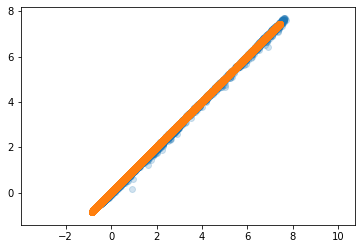

In [18]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [19]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(134999, 89)
(134999, 2)


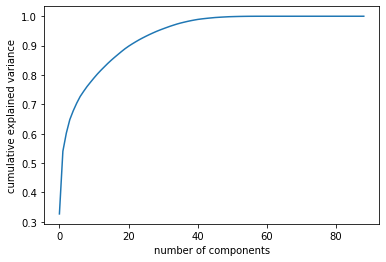

In [22]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# PCA labeld by industry / sector

In [25]:
df_features = df[df.columns[11:]]
df_features.dropna(inplace=True)

y = df['Sector']
y.dropna(inplace=True)
X = df_features
y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         Transportation & Logistics
1         Transportation & Logistics
2         Transportation & Logistics
3         Transportation & Logistics
4         Transportation & Logistics
                     ...            
134994            Media & Publishing
134995            Media & Publishing
134996            Media & Publishing
134997            Media & Publishing
134998            Media & Publishing
Name: Sector, Length: 134999, dtype: object

In [26]:
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [27]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_scaled)
print(X_scaled.shape)
print(projected.shape)

(134999, 89)
(134999, 2)


In [28]:
colorkey = y.unique()
colordict = {}
for i, v in enumerate(colorkey):
    colordict[v] = i
colordict

{'Transportation & Logistics': 0,
 'Information & Communication Technology': 1,
 'Finance & Securities': 2,
 'Property Development': 3,
 'Energy & Utilities': 4,
 'Banking': 5,
 'Health Care Services': 6,
 'Commerce': 7,
 'Media & Publishing': 8,
 'Construction Services': 9,
 'Insurance': 10,
 'Food & Beverage': 11,
 'Tourism & Leisure': 12,
 'Electronic Components': 13,
 'Construction Materials': 14,
 'Agribusiness': 15,
 'Petrochemicals & Chemicals': 16,
 'Packaging': 17}

In [29]:
y = y.map(colordict)

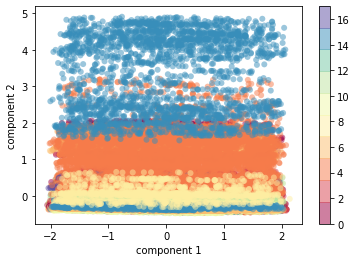

In [30]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Label ticker

In [31]:
y = df['Ticker']
colorkey = y.unique()
colordict = {}
for i, v in enumerate(colorkey):
    colordict[v] = i
colordict
y = y.map(colordict)

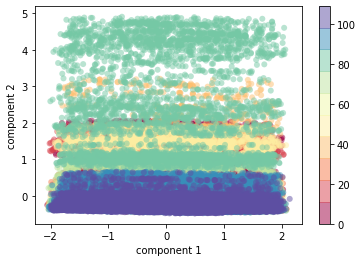

In [34]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();